In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## The probability density for the Gaussian distribution

$\large
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$

$\mu = \frac{1}{N}\sum_{i=1}^{N}{x_i}$ , is the mean of distribution

$\sigma^2 = \frac{1}{N}\sum_{i=1}^{N}{(x_i-\mu)^2}$ , is the variance of distribution

$\sigma$ , is the standard deviation (std) of distribution

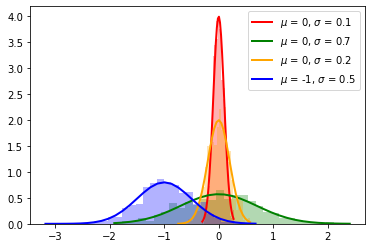

In [2]:
mu_list = [0, 0, 0, -1]
sigma_list = [0.1, 0.7, 0.2, 0.5]
color_list = ["red", "green", "orange", "blue"]

for mu, sigma, c in zip(mu_list, sigma_list, color_list):
    s = np.random.normal(mu, sigma, 1000)
    count, bins, ignored = plt.hist(s, 30, density=True, color=c, alpha=0.3) # return info of plot
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color=c,
             label=f"$\mu$ = {mu}, $\sigma$ = {sigma}")
plt.legend()
plt.show()

## The probability density for the Poisson distribution

**Poisson distribution**代表發生次數(因此 np.random.poisson 產生的都是正整數)，該分布的母體平均值為$\lambda$ 

$\large
Prob(k) = \frac{e^{-\lambda} \: \lambda^k}{k!}
$

k為該事件發生的次數，Prob(k)為該次事件發生k次在此分布下的機率

$\lambda$ , is the mean of distribution


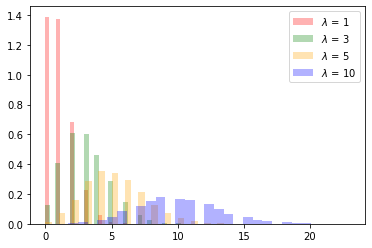

In [3]:
lambda_list = [1, 3, 5, 10]
color_list = ["red", "green", "orange", "blue"]

for lb, c in zip(lambda_list, color_list):
    s = np.random.poisson(lb, 10000) # int
    count, bins, ignored = plt.hist(s, 30, density=True, color=c, alpha=0.3, label=f"$\lambda$ = {lb}") # return info of plot
plt.legend()
plt.show()

## seaborn

In [4]:
# load data from seaborn
penguins = sns.load_dataset("penguins")

In [5]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


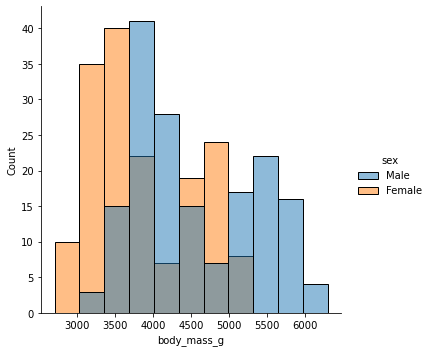

In [6]:
sns.displot(data=penguins, x="body_mass_g", hue="sex")

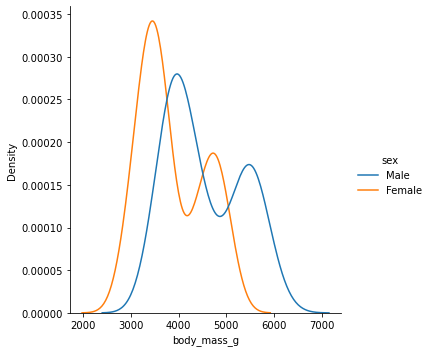

In [7]:
# histplot() (with kind="hist")

# kdeplot() (with kind="kde")

# ecdfplot() (with kind="ecdf")
sns.displot(data=penguins, x="body_mass_g", hue="sex", kind="kde")

雙峰 只看sex似乎不夠 在考慮物種~

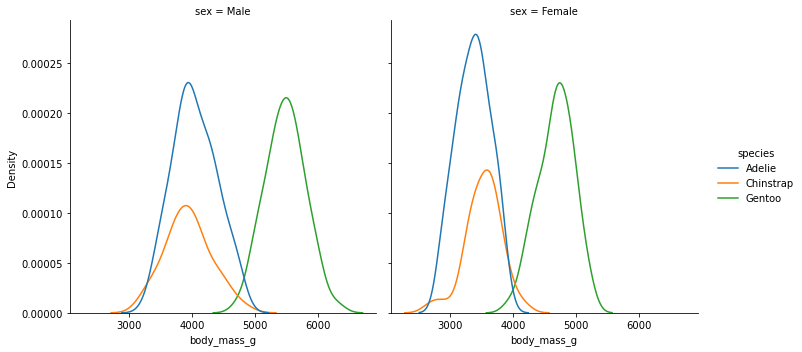

In [8]:
# 雙峰 只看sex似乎不夠 在考慮物種~
# hue 小區分; col 大區分
sns.displot(data=penguins, x="body_mass_g", hue="species", col="sex", kind="kde")

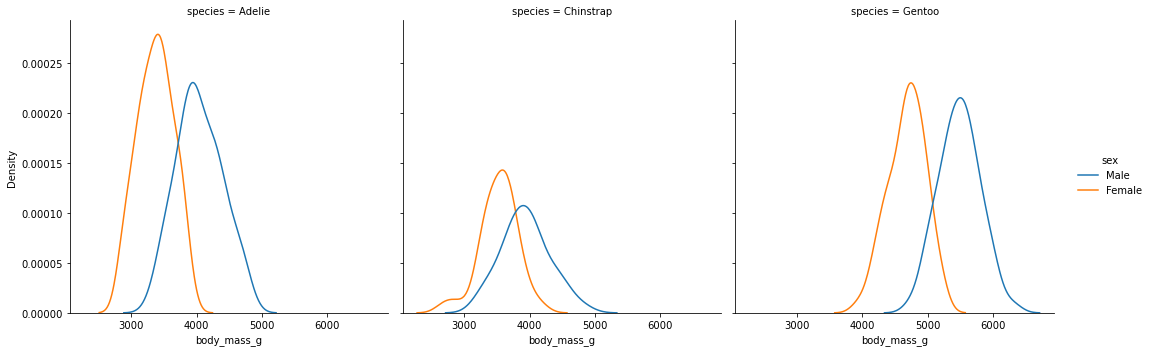

In [9]:
sns.displot(data=penguins, x="body_mass_g", hue="sex", col="species", kind="kde")

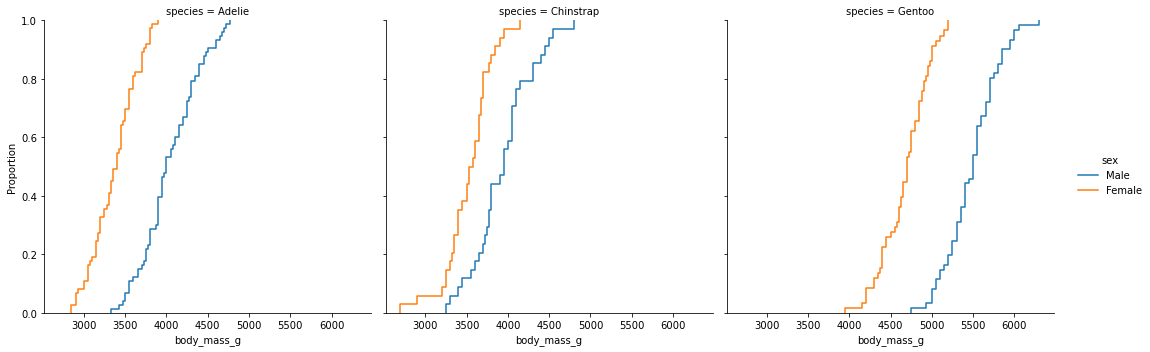

In [10]:
sns.displot(data=penguins, x="body_mass_g", hue="sex", col="species", kind="ecdf")

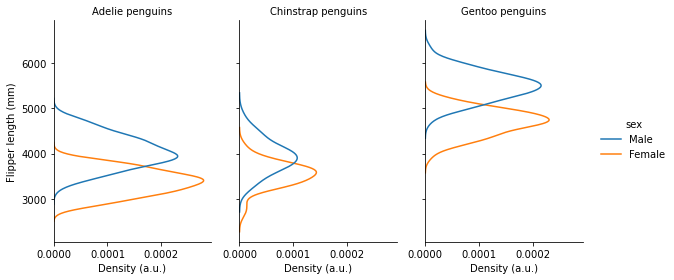

In [11]:
g = sns.displot(
    data=penguins, y="body_mass_g", hue="sex", col="species",
    kind="kde", height=4, aspect=.7,
)
g.set_axis_labels("Density (a.u.)", "Flipper length (mm)")
g.set_titles("{col_name} penguins")

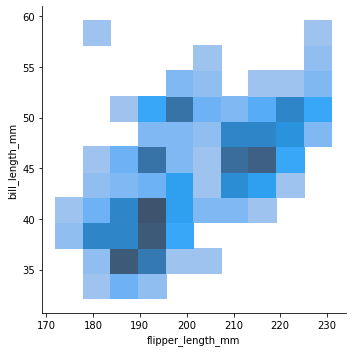

In [12]:
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm")

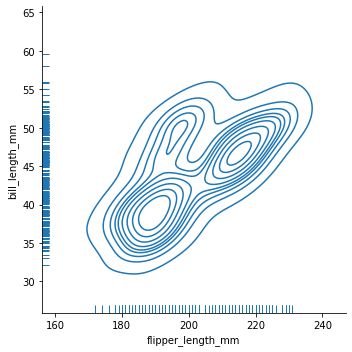

In [13]:
g = sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind="kde", rug=True)

## 利用 displot 的lines 得到整理後的data

In [14]:
def findPeak(curve):
    
    y = curve.get_ydata()
    maxpos = y.argmax()
    y_max = y.max()
    y_min = y.min()
    
    return (maxpos, y_max, y_min)

def findFWHM(curve):
    
    x = curve.get_xdata()
    y = curve.get_ydata()
    halfmax = y.max() / 2
    maxpos = y.argmax()
    leftpos = (np.abs(y[:maxpos] - halfmax)).argmin()
    rightpos = (np.abs(y[maxpos:] - halfmax)).argmin() + maxpos
    
    return (halfmax, x[leftpos], x[rightpos])

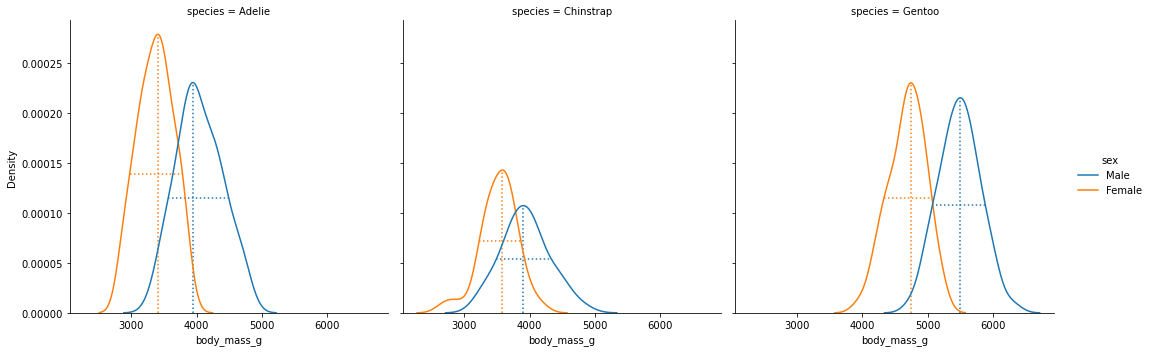

In [15]:
g = sns.displot(data=penguins, x="body_mass_g", hue="sex", col="species", kind="kde")

gax = g.axes #.flatten()
#print(ax[0][1])

gax = gax[0]
#len(gax)

# chart
for chart in range(len(gax)):
    for idx in range(len(gax[chart].lines)):
        line_data = gax[chart].lines[idx] # 3 * 2 -dim
        x = line_data.get_xdata()
        y = line_data.get_ydata()
        c = line_data.get_color()
        
        halfmax, x_l, x_r = findFWHM(line_data)
        maxpos, y_max, y_min = findPeak(line_data)
        
        gax[chart].vlines(x[maxpos], y_min, y_max, linestyle=":", color=c)
        gax[chart].hlines(halfmax, x_l, x_r, linestyle=":", color=c)

AxesSubplot(0.125,0.125;0.775x0.755)


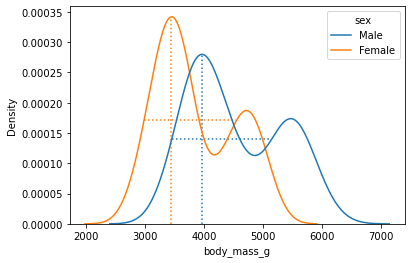

In [16]:
g = sns.kdeplot(data=penguins, x="body_mass_g", hue="sex")
print(g)
for idx in range(len(g.lines)):
    line_data = g.lines[idx]
    x = line_data.get_xdata()
    y = line_data.get_ydata()
    c = line_data.get_color()
                 
    halfmax, x_l, x_r = findFWHM(line_data)
    maxpos, y_max, y_min = findPeak(line_data)

    g.vlines(x[maxpos], y_min, y_max, linestyle=":", color=c)
    g.hlines(halfmax, x_l, x_r, linestyle=":", color=c)

## t-test

衡量兩組數據之間的平均值是否有差異

**為何不直接看平均值?**，假設兩組數據皆是從母體取樣，為了避免取樣誤差造成誤判，因此透過t-test來減少疑慮

**t-distribution**

抽樣下的常態分佈

$\large
f(x) = \frac{\Gamma{(\frac{v+1}{2})}}{\sqrt{v\pi}\Gamma{(\frac{v}{2})}}(1+\frac{x^2}{v})
$

$v = n1 + n2 - 2$ is total sample D.O.F 

v越大 越接近常態分佈 (v > 100)

**t-statistic**

$\large
t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{\sigma^2_1}{n_1} + \frac{\sigma^2_2}{n_2}}}
$

$\sigma$ is std

**p-value**

$
p = \int_{t}^{\infty} f(x)
$

要注意是否two-tail => p*2

**0.05?**

P > 0.05，代表得到的t落在95%區間**內**，無法拒絕H0假說(null hypothesis) <br>
P < 0.05，代表得到的t落在95%區間**外**，有足夠的證據拒絕H0假說，即成立H1假說(alternative hypothesis)

In [17]:
df1 = penguins[(penguins["sex"] == "Male") & (penguins["species"] == "Adelie")]["body_mass_g"]
df2 = penguins[(penguins["sex"] == "Female") & (penguins["species"] == "Adelie")]["body_mass_g"]

In [18]:
from scipy import stats

t, p = stats.ttest_ind(df1, df2)

print(f"t = {t:.3f}")
print(f"p = {p:.3f}")

if (p > 0.05):
    print("accept H0 hypothesis")
else:
    print("reject H0 hypothesis")

t = 13.126
p = 0.000
reject H0 hypothesis


at species = Adelie, body_mass_g have diff between Male and Female

## ANOVA, F-test

T-test的多維版本，衡量K組織間的平均值是否有差異

**F-distribution**

請查F-表 d.f=(dfw, dfb)

**F-statistic**

$\large
F = \frac{MS_B}{MS_W}
$

$MS_B$ = 平均組**間**變異 <br>
$MS_W$ = 平均組**內**變異 

F越大，代表各組之間的差異越大

以下: 共N筆數據，分成K組

$\large
SST = SSW + SSB = \sum{(X_i - \bar{X})^2}
$

$\large
SSB = \sum{N_K(\bar{X_K} - \bar{X})^2}
$

$\large
SSW = \sum{(X_i - \bar{X_K})^2}
$

$\large dfb = K - 1$, D.O.F between

$\large dfw = N - K$, D.O.F within

$\large
MS_B = \frac{SSB}{dfb}
$

$\large
MS_W = \frac{SSW}{dfw}
$


**p-value**

概念同t-test的p值，做積分~

P > 0.05，代表得到的t落在95%區間**內**，無法拒絕H0假說(null hypothesis) <br>
P < 0.05，代表得到的t落在95%區間**外**，有足夠的證據拒絕H0假說，即成立H1假說(alternative hypothesis)

In [19]:
f, p = stats.f_oneway(df1, df2)

print(f"f = {f:.3f}")
print(f"p = {p:.3f}")

f = 172.299
p = 0.000


In [20]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('body_mass_g ~ C(sex) + C(species)', data=penguins).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(sex),3.709026e+07,1.0,370.012058,8.729411e-56
C(species),1.434016e+08,2.0,715.286340,1.618971e-120
Residual,3.297919e+07,329.0,NaN,NaN


In [21]:
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

In [22]:
df2

0     3800.0
1     3250.0
2     3450.0
3     3625.0
4     3200.0
       ...  
68    3050.0
69    3000.0
70    3475.0
71    3450.0
72    3700.0
Name: body_mass_g, Length: 73, dtype: float64

In [23]:
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ["Male","Female"]
df3

,Male,Female
0,3750.0,3800.0
1,3650.0,3250.0
2,4675.0,3450.0
3,3800.0,3625.0
4,4400.0,3200.0
...,...,...
68,3725.0,3050.0
69,3650.0,3000.0
70,4250.0,3475.0
71,3750.0,3450.0


In [24]:
df_melt = pd.melt(df3.reset_index(), id_vars=['index'], value_vars=['Male', 'Female'])
df_melt.columns = ['index', 'treatments', 'value']
df_melt

,index,treatments,value
0,0,Male,3750.0
1,1,Male,3650.0
2,2,Male,4675.0
3,3,Male,3800.0
4,4,Male,4400.0
...,...,...,...
141,68,Female,3050.0
142,69,Female,3000.0
143,70,Female,3475.0
144,71,Female,3450.0


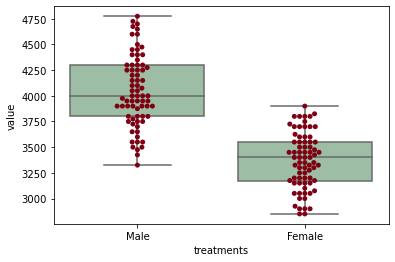

In [25]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [26]:
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),1.661344e+07,1.0,172.299382,2.220644e-26
Residual,1.388476e+07,144.0,NaN,NaN


## jointplot

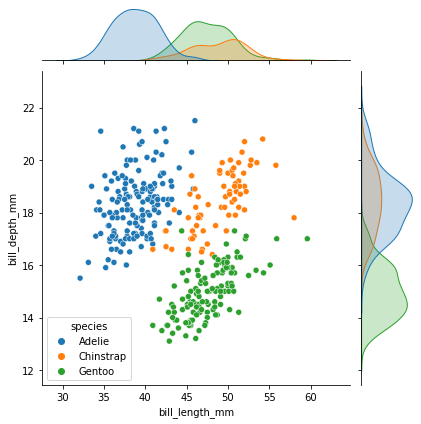

In [27]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")